# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm
from scipy.optimize import curve_fit

# Load the datasets

In [2]:
# load dataset players
print("PLAYERS")
urlPlayers = 'copyCsvReal.xlsx'
dataframePlayers = pd.read_excel(urlPlayers, header=0, index_col=None)
# summarize shape
print("Shape: " + str(dataframePlayers.shape))
# summarize first few lines
print("Summary Players")
print(dataframePlayers)

PLAYERS
Shape: (539, 25)
Summary Players
       Id Role         Name     Squad  Price  MyRating         Mate  \
0    4431    P  Carnesecchi  Atalanta     10       NaN        Musso   
1    2792    P        Musso  Atalanta      5       NaN  Carnesecchi   
2    2297    P     Rossi F.  Atalanta      1       NaN          NaN   
3     554    D   Zappacosta  Atalanta     15       NaN         Holm   
4    5067    D       Bakker  Atalanta     11       NaN      Ruggeri   
..    ...  ...          ...       ...    ...       ...          ...   
534  5529    A        Henry    Verona     11       NaN          NaN   
535  5471    A       Djuric    Verona     10       NaN    Bonazzoli   
536   505    A    Bonazzoli    Verona      8       NaN       Djuric   
537  5395    A        Braaf    Verona      1       NaN          NaN   
538  5439    A       Kallon    Verona      1       NaN          NaN   

     Regularness  FVM  Age  ...  Mf21_22  Pg20_21  Mv20_21  Mf20_21  Pg19_20  \
0              3   10   23

# Initialize variables

In [3]:
roles = ['P', 'D', 'C', 'A']
columns = ["Pg", "Mv", "Mf"]
seasons = ["22_23", "21_22", "20_21", "19_20", "18_19"]
min_matches = 11

# Create subdatasets given the roles of players

In [4]:
# Create the separate dataframes for ease of use
dataframeKeep = dataframePlayers[dataframePlayers['Role'] == roles[0]]
print("Esempio Portieri")
print(dataframeKeep)
dataframeDef = dataframePlayers[dataframePlayers['Role'] == roles[1]]
dataframeMid = dataframePlayers[dataframePlayers['Role'] == roles[2]]
dataframeAtt = dataframePlayers[dataframePlayers['Role'] == roles[3]]
# Put in one list
dataframes = [dataframeKeep, dataframeDef, dataframeMid, dataframeAtt]

Esempio Portieri
       Id Role         Name     Squad  Price  MyRating         Mate  \
0    4431    P  Carnesecchi  Atalanta     10       NaN        Musso   
1    2792    P        Musso  Atalanta      5       NaN  Carnesecchi   
2    2297    P     Rossi F.  Atalanta      1       NaN          NaN   
26    133    P    Skorupski   Bologna     10       NaN          NaN   
27   2722    P  Ravaglia F.   Bologna      1       NaN          NaN   
..    ...  ...          ...       ...    ...       ...          ...   
479   543    P      Padelli   Udinese      1       NaN          NaN   
480  6462    P        Okoye   Udinese      1       NaN          NaN   
509  4957    P     Montipo'    Verona      8       NaN          NaN   
510  4491    P   Berardi A.    Verona      1       NaN          NaN   
511   511    P      Perilli    Verona      1       NaN          NaN   

     Regularness  FVM  Age  ...  Mf21_22  Pg20_21  Mv20_21  Mf20_21  Pg19_20  \
0              3   10   23  ...     0.00        0 

# Expected Mf

In [5]:
# Define a Gaussian function
def gaussian(x, mu, sigma, A):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

# Function to calculate expected performance for a given age
def expected_performance(age, mu, sigma, A):
    return gaussian(age, mu, sigma, A)

# Function that returns the expected difference in performance for a given age
def expected_diff_performance(age, *params):
    return expected_performance(age, *params) - expected_performance(age-1, *params)

## Performance by Age

**Visualization**

P


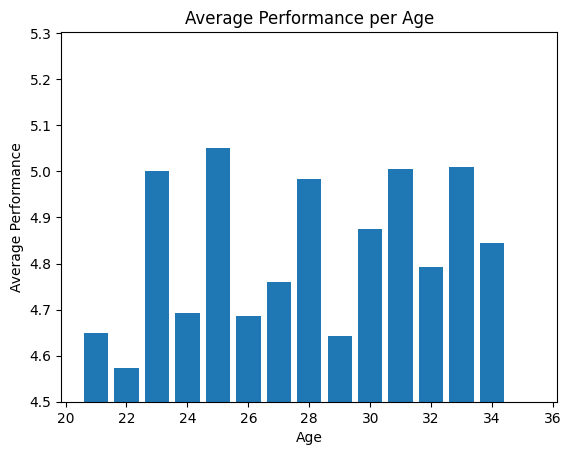

D


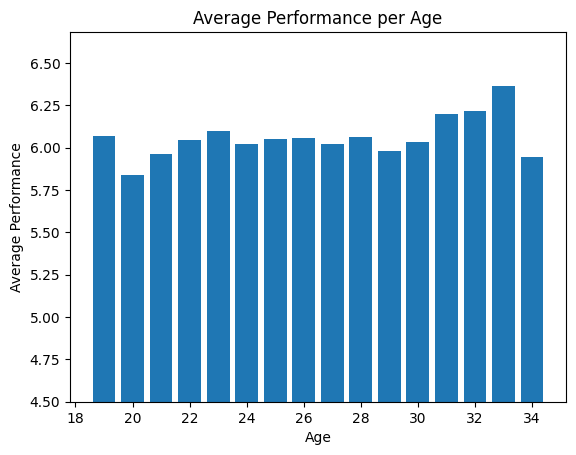

C


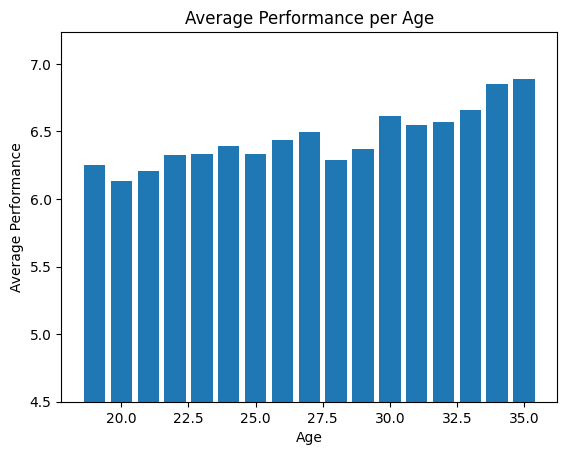

A


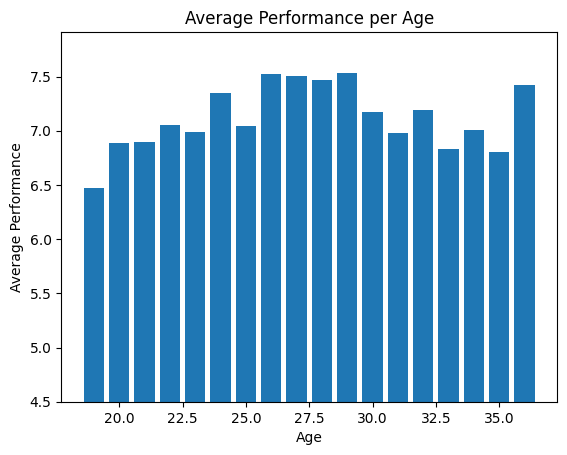

In [6]:
# Fit the data to a Gaussian distribution to get mean and standard deviation
for i, df in enumerate(dataframes):
    print(roles[i])
    players = []
    for index, row in df.iterrows():
        # Filter players
        for k in seasons:
            if row['Pg'+k] >= 22:
                players.append({
                    'Name': row['Name'],
                    'Age': row['Age']- 1 - seasons.index(k),
                    'MfPerformance': row['Mf'+k],
                    'MvPerformance': row['Mv'+k]
                    })
    new_df = pd.DataFrame(players)
    # Group by Age and calculate the average performance
    average_performance_per_age = new_df.groupby('Age')['MfPerformance'].mean()

    # Plot the histogram
    plt.bar(average_performance_per_age.index, average_performance_per_age.values)
    plt.ylim(bottom = 4.5)
    plt.xlabel('Age')
    plt.ylabel('Average Performance')
    plt.title('Average Performance per Age')
    plt.show()

**Regression**

P
Diff P= 0.4806522133872617


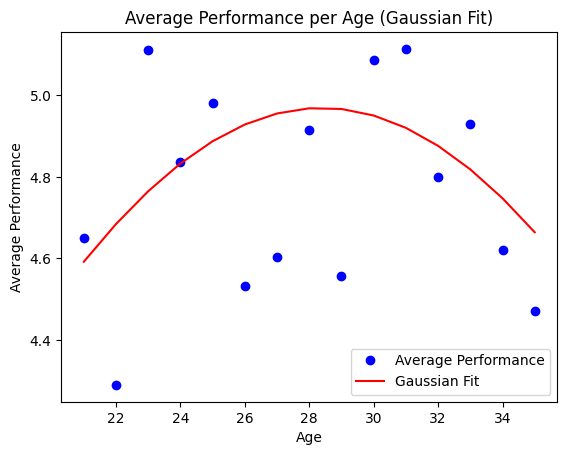

D
Diff D= 0.8572565634468869


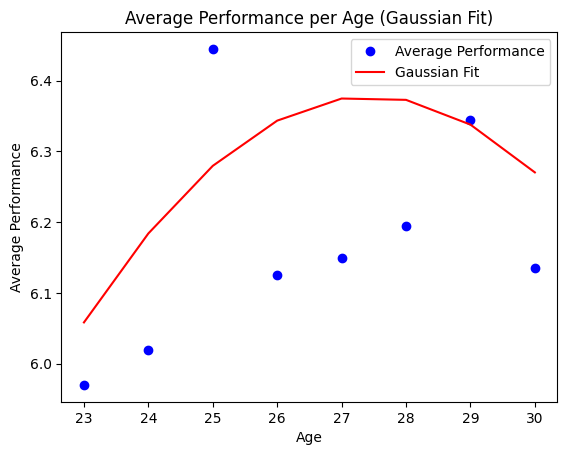

C
Diff C= 0.4610901831273928


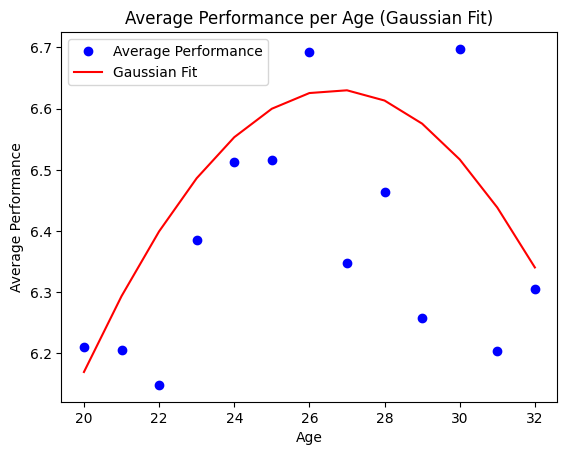

A
Diff A= 1.8719559590453327


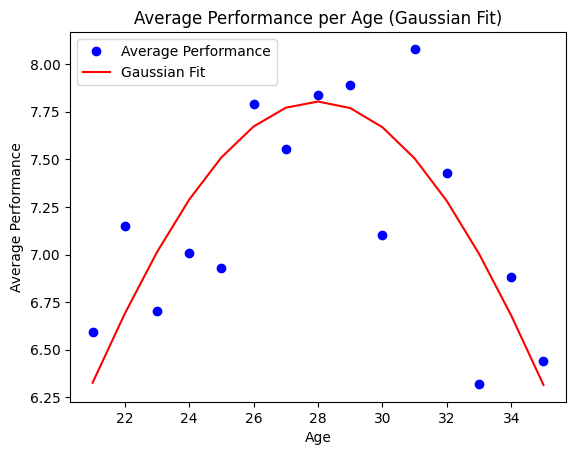

In [7]:
# Fit the data to a Gaussian distribution
stats_models = []
counters = [1,1,1,1]
games = [23, 33, 23, 28]
for i, df in enumerate(dataframes):
    print(roles[i])
    players = []
    for index, row in df.iterrows():
        # Filter players
        counter = 0
        for t in seasons:
            if row['Pg'+k] >= games[i]:
                counter += 1
        if counter > counters[i]:    
            for k in seasons:
                if row['Pg'+k] >= games[i]:
                    players.append({
                        'Name': row['Name'],
                        'Age': row['Age']- 1 - seasons.index(k),
                        'MfPerformance': row['Mf'+k],
                        'MvPerformance': row['Mv'+k]
                        })
    new_df = pd.DataFrame(players)
    # Filter defenders
    if i == 1:
        new_df = new_df[new_df['Age'] > 22]
        new_df = new_df[new_df['Age'] < 31]
    # Group by Age and calculate the average performance
    average_performance_per_age = new_df.groupby('Age')['MfPerformance'].mean()

    # Fit the Gaussian curve to the data
    x_data = average_performance_per_age.index
    y_data = average_performance_per_age.values
    # Provide initial guesses for parameters
    mu_initial_guess = np.mean(x_data)
    sigma_initial_guess = np.std(x_data) * 15
    A_initial_guess = max(y_data)

    p0 = [mu_initial_guess, sigma_initial_guess, A_initial_guess]

    # Fit the Gaussian curve with initial parameter guesses
    try:
        popt, pcov = curve_fit(gaussian, x_data, y_data, p0=p0)
        popt[1] *= 0.9
        popt[2] *= 1.02
    except RuntimeError:
        # If fitting fails, provide fallback values
        popt = p0
    # Save parameters
    stats_models.append(popt)
    # Print difference leftmost and mean
    mean = popt[0]
    difference = expected_performance(mean, *popt) - expected_performance(20, *popt)
    print(f"Diff {roles[i]}= {difference}")
    # Plot the fitted Gaussian curve
    plt.plot(x_data, y_data, 'bo', label='Average Performance')
    plt.plot(x_data, gaussian(x_data, *popt), 'r-', label='Gaussian Fit')
    plt.xlabel('Age')
    plt.ylabel('Average Performance')
    plt.title('Average Performance per Age (Gaussian Fit)')
    plt.legend()
    plt.show()

## Performance by FVM

**Visualization**

P


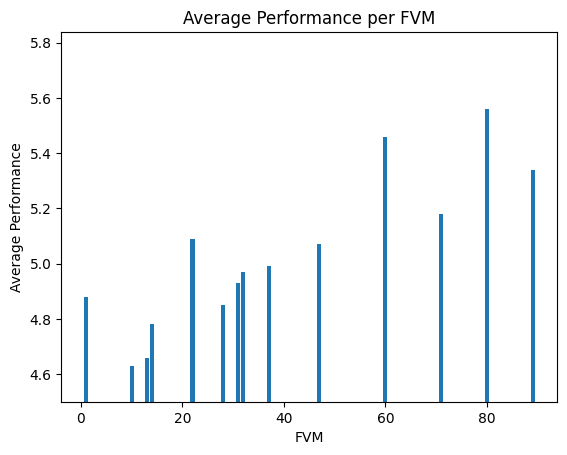

D


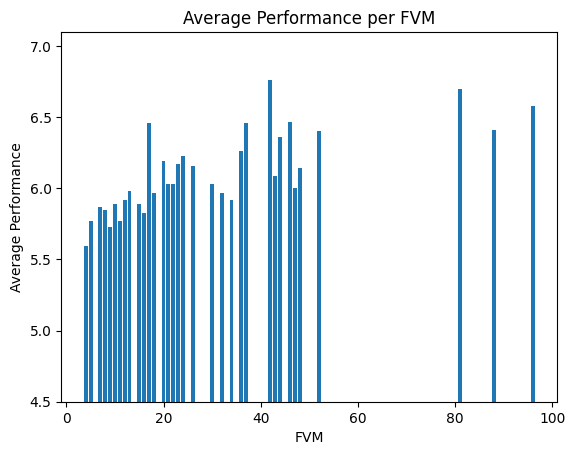

C


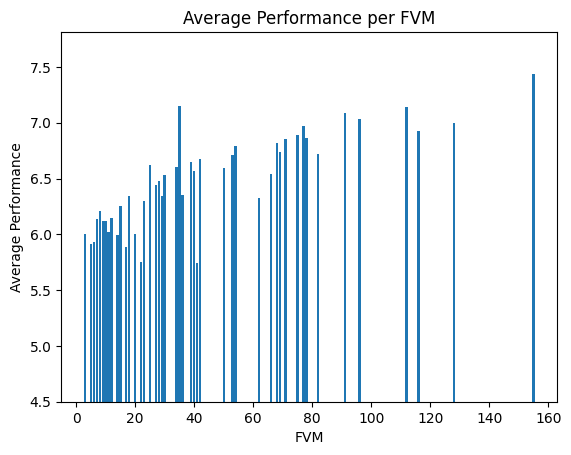

A


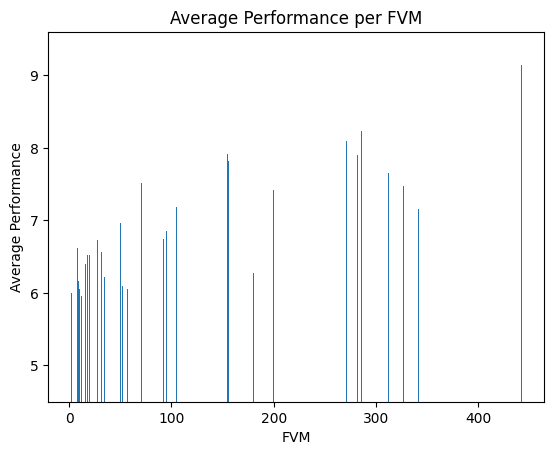

In [8]:
for i, df in enumerate(dataframes):
    print(roles[i])
    players = []
    for index, row in df.iterrows():
        # Filter players
        
        if row['Pg22_23'] >= 22:
            players.append({
                'Name': row['Name'],
                'FVM': row['FVM'],
                'MfPerformance': row['Mf22_23'],
                'MvPerformance': row['Mv22_23']
                })
    new_df = pd.DataFrame(players)
    # Group by Age and calculate the average performance
    average_performance_per_age = new_df.groupby('FVM')['MfPerformance'].mean()

    # Plot the histogram
    plt.bar(average_performance_per_age.index, average_performance_per_age.values)
    plt.ylim(bottom = 4.5)
    plt.xlabel('FVM')
    plt.ylabel('Average Performance')
    plt.title('Average Performance per FVM')
    plt.show()

**Regression**

P


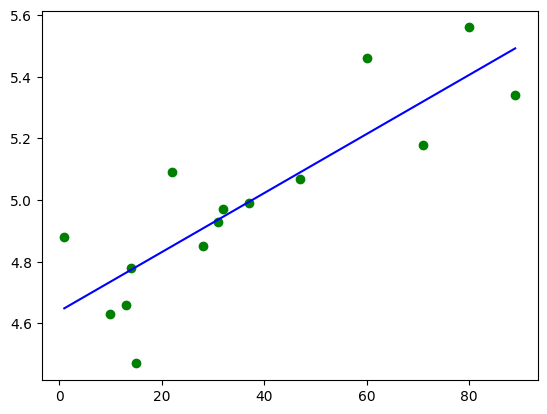

D


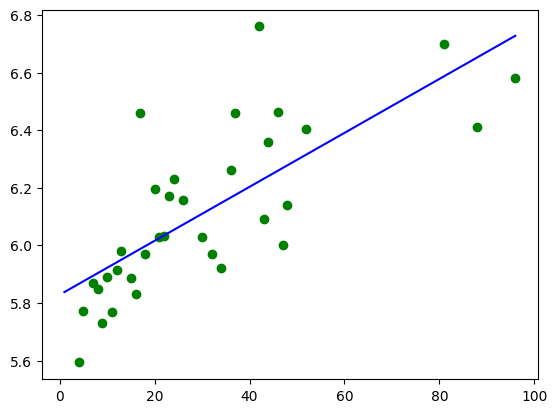

C


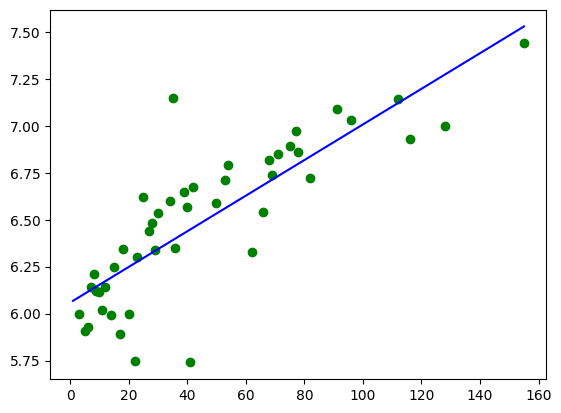

A


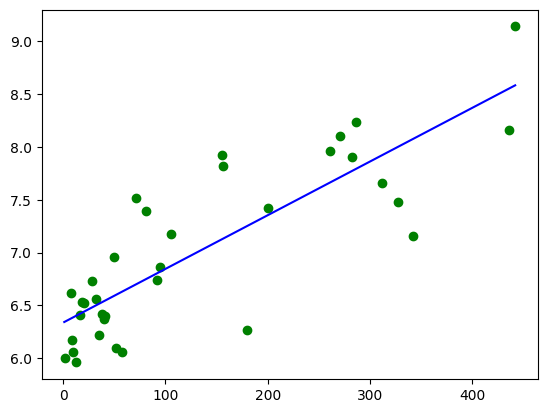

In [9]:
# Regressions per role
fvm_models = []
for i, df in enumerate(dataframes):
    print(roles[i])
    players = []
    for index, row in df.iterrows():
        # Filter players
        if row['Pg22_23'] >= 22:
            players.append({
                'Name': row['Name'],
                'FVM': row['FVM'],
                'MfPerformance': row['Mf22_23'],
                'MvPerformance': row['Mv22_23']
                })
    new_df = pd.DataFrame(players)
    # Group by Age and calculate the average performance
    average_performance_per_age = new_df.groupby('FVM')['MfPerformance'].mean()

    # Fit the data to a curve
    x_data = average_performance_per_age.index
    y_data = average_performance_per_age.values

    model = np.poly1d(np.polyfit(x_data, y_data, 1))
    fvm_models.append(model)
    
    myline = np.linspace(1, max(x_data), 100)

    plt.scatter(x_data, y_data, color='green')
    plt.plot(myline, model(myline), color='blue')
    plt.show()

## Get Expected Performance for Next Season

In [10]:
# Create a new column with NaN values
new_column = pd.Series([np.nan] * len(dataframePlayers), name='ExpectedMf')
for index, row in dataframePlayers.iterrows():
    # Get index of role
    i = roles.index(row['Role'])
    # Get fvm expected performance
    fvm_perf = fvm_models[i](row['FVM'])
    # Get age expected performance
    if row['Mf'+seasons[0]] != 0 and row['Pg'+seasons[0]] >= 22:
        weight_fvm = 0.1
        weight_age = 0.9
        age_perf = row['Mf'+seasons[0]] + expected_diff_performance(row['Age'], *stats_models[i])
    else:
        weight_fvm = 0.5
        weight_age = 0.5
        age_perf = expected_performance(row['Age'], *stats_models[i])
    weighted_perf = weight_fvm * fvm_perf + weight_age * age_perf
    dataframePlayers.at[index, 'ExpectedMf'] = round(weighted_perf, 2)
'''for i in range(4):
    diffs = []
    for k in range(18, 36):
        diffs.append(expected_diff_performance(k, *stats_models[i]))
    print(f"Difference for {roles[i]}: {diffs}")'''
print(dataframePlayers.loc[dataframePlayers['Name']=='Loftus-Cheek'])

       Id Role          Name  Squad  Price  MyRating Mate  Regularness  FVM  \
308  4199    C  Loftus-Cheek  Milan     14       NaN  NaN            5   33   

     Age  ...  Pg20_21  Mv20_21  Mf20_21  Pg19_20  Mv19_20  Mf19_20  Pg18_19  \
308   27  ...        0      0.0      0.0        0      0.0      0.0        0   

     Mv18_19  Mf18_19  ExpectedMf  
308      0.0      0.0         6.5  

[1 rows x 26 columns]


# Rereate subdatasets given the roles of players

In [11]:
# Create the separate dataframes for ease of use
dataframeKeep = dataframePlayers[dataframePlayers['Role'] == roles[0]]
print("Esempio Portieri")
print(dataframeKeep)
dataframeDef = dataframePlayers[dataframePlayers['Role'] == roles[1]]
dataframeMid = dataframePlayers[dataframePlayers['Role'] == roles[2]]
dataframeAtt = dataframePlayers[dataframePlayers['Role'] == roles[3]]
# Put in one list
dataframes = [dataframeKeep, dataframeDef, dataframeMid, dataframeAtt]

Esempio Portieri
       Id Role         Name     Squad  Price  MyRating         Mate  \
0    4431    P  Carnesecchi  Atalanta     10       NaN        Musso   
1    2792    P        Musso  Atalanta      5       NaN  Carnesecchi   
2    2297    P     Rossi F.  Atalanta      1       NaN          NaN   
26    133    P    Skorupski   Bologna     10       NaN          NaN   
27   2722    P  Ravaglia F.   Bologna      1       NaN          NaN   
..    ...  ...          ...       ...    ...       ...          ...   
479   543    P      Padelli   Udinese      1       NaN          NaN   
480  6462    P        Okoye   Udinese      1       NaN          NaN   
509  4957    P     Montipo'    Verona      8       NaN          NaN   
510  4491    P   Berardi A.    Verona      1       NaN          NaN   
511   511    P      Perilli    Verona      1       NaN          NaN   

     Regularness  FVM  Age  ...  Pg20_21  Mv20_21  Mf20_21  Pg19_20  Mv19_20  \
0              3   10   23  ...        0     0.00 

# Rating Assignment

## Compute Layers for Rating

We need to set some levels of "goodness".

The levels are based on the statistics of last years in order to give an objective rating on the players.

They will be used with orders of importance, 22/23 is more important than 19/20.

**Media FantaVoto**

P


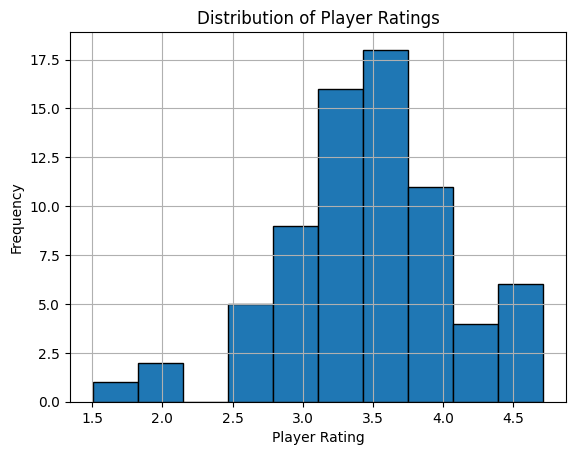

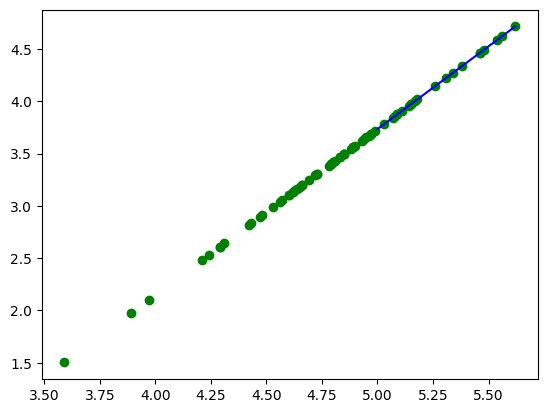

D


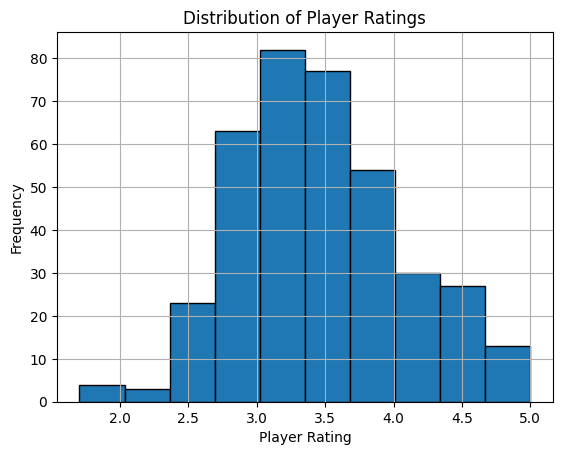

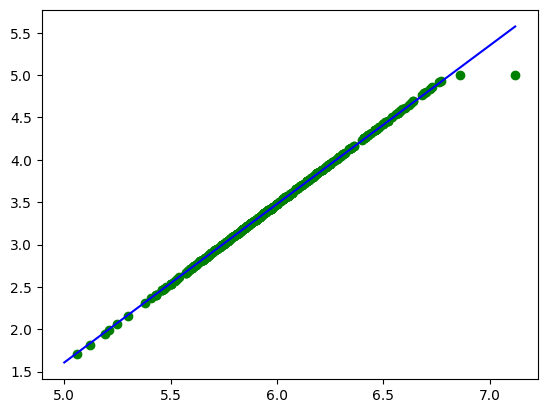

C


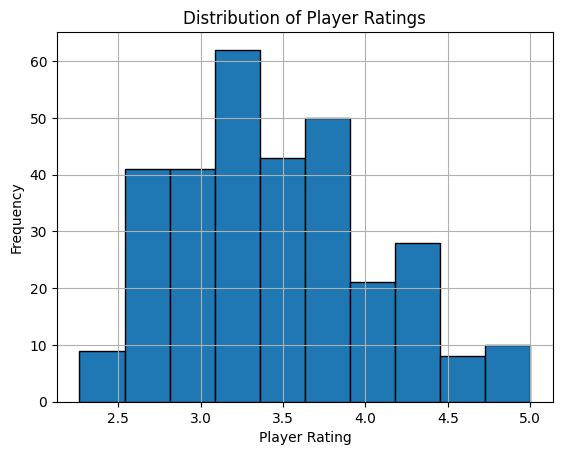

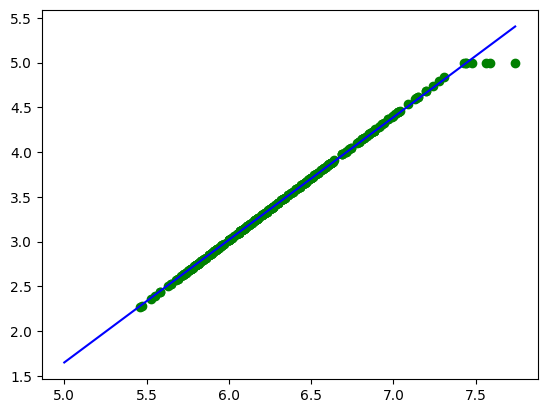

A


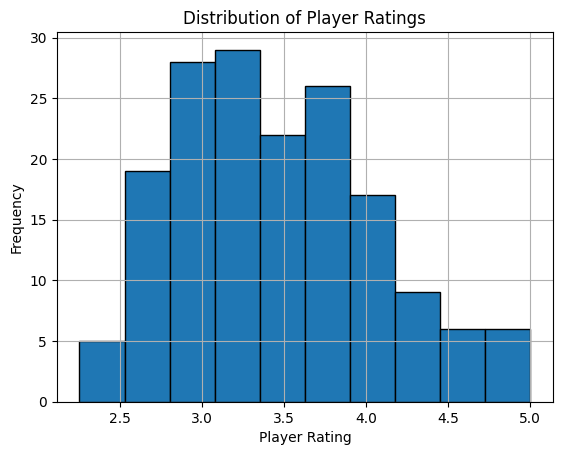

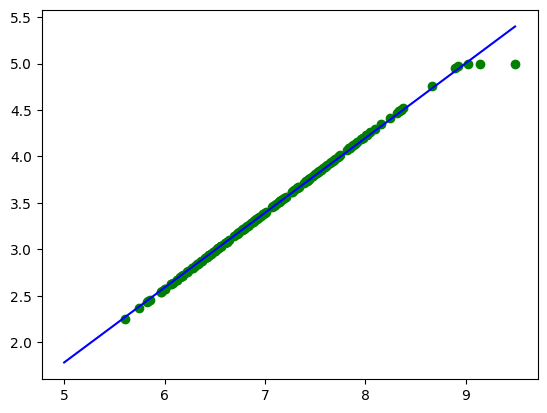

In [82]:
# Function to map z-scores to ratings
def map_to_rating(z_score):
    # Linear mapping from z-score to rating scale (1 to 10)
    min_z = -4  # Minimum z-score
    max_z = 2.5   # Maximum z-score
    min_rating = 1
    max_rating = 5
    
    # Map z-score to rating
    rating = min_rating + ((max_rating - min_rating) * (z_score - min_z) / (max_z - min_z))
    
    # Ensure rating is within the valid range
    return max(min(rating, max_rating), min_rating)

# Initialize levels array
stats_models = []

# Fit the data to a Gaussian distribution to get mean and standard deviation
for i, df in enumerate(dataframes):
    print(roles[i])
    # Filter players that didn't play enough
    votes = []
    for season in seasons:
        filtered_df = df[df['Pg' + season] > min_matches]
        # Get the array of FantaVoti
        votes.append(filtered_df['Mf' + season].to_numpy())
    votes = np.concatenate(votes)

    # Calculate mean and standard deviation
    mean_value = np.mean(votes)
    std_dev = np.std(votes)

    # Calculate z-scores and map to ratings for each player
    player_ratings = []
    for value in votes:
        z_score = (value - mean_value) / std_dev
        rating = map_to_rating(z_score)
        player_ratings.append(rating)

    # Plot histogram of player ratings
    plt.hist(player_ratings, bins=10, edgecolor='black')
    plt.xlabel('Player Rating')
    plt.ylabel('Frequency')
    plt.title('Distribution of Player Ratings')
    plt.grid(True)
    plt.show()

    x_data = votes
    y_data = player_ratings

    model = np.poly1d(np.polyfit(x_data, y_data, 1))
    stats_models.append(model)
    
    myline = np.linspace(5, max(x_data), 100)

    plt.scatter(x_data, y_data, color='green')
    plt.plot(myline, model(myline), color='blue')
    plt.show()

**FVM**

In [187]:
log_base = 1.2

P


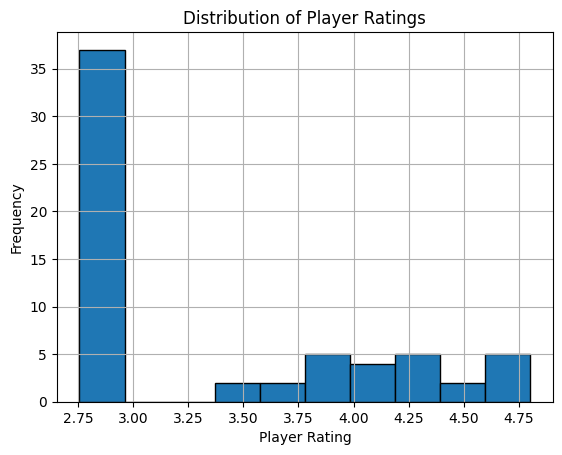

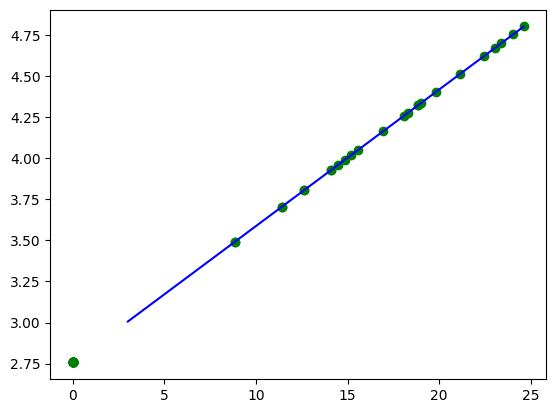

D


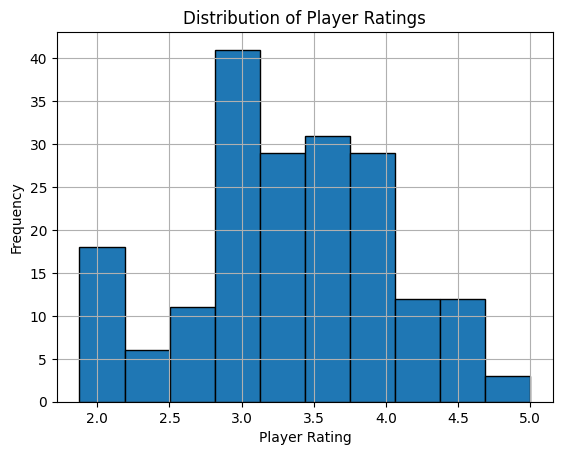

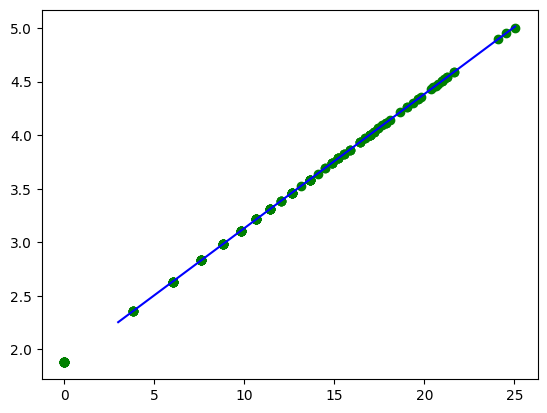

C


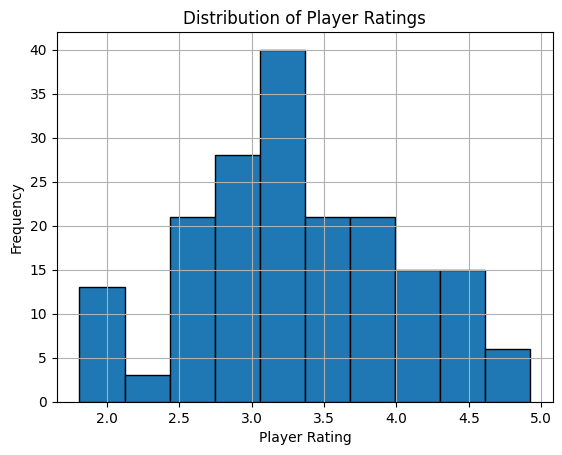

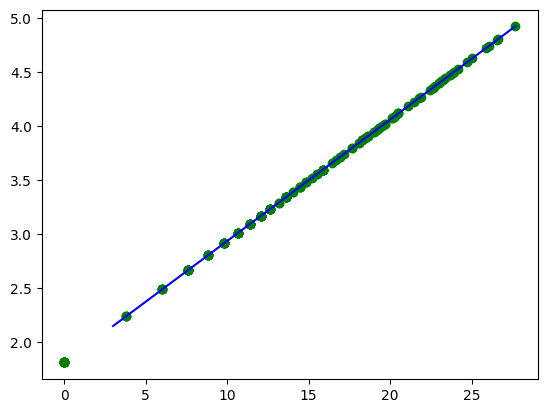

A


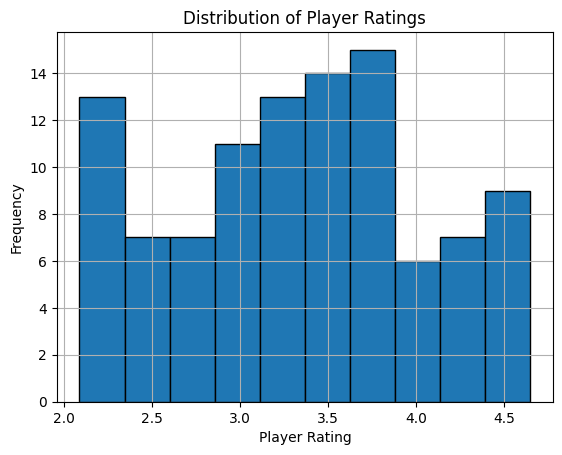

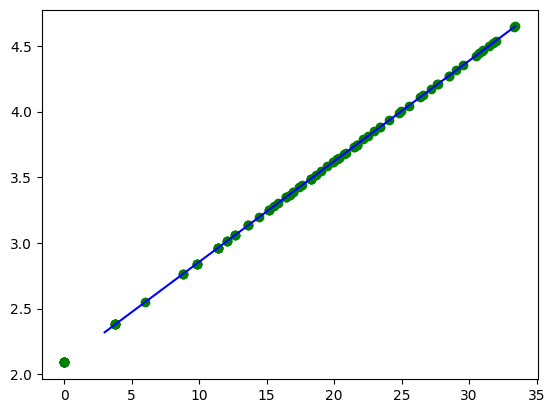

In [192]:
# Function to map z-scores to ratings
def map_to_rating(z_score):
    # Linear mapping from z-score to rating scale (1 to 10)
    min_z = -2.5  # Minimum z-score
    max_z = 2.3   # Maximum z-score
    min_rating = 1.5
    max_rating = 5
    
    # Map z-score to rating
    rating = min_rating + ((max_rating - min_rating) * (z_score - min_z) / (max_z - min_z))
    
    # Ensure rating is within the valid range
    return max(min(rating, max_rating), min_rating)

# Initialize levels array
fvm_models = []

# Fit the data to a Gaussian distribution to get mean and standard deviation
for i, df in enumerate(dataframes):
    print(roles[i])
    # Get the array of FantaVoti
    votes = df['FVM'].to_numpy()

    votes = np.log(votes) / np.log(log_base)

    # Calculate mean and standard deviation
    mean_value = np.mean(votes)
    std_dev = np.std(votes)

    # Calculate z-scores and map to ratings for each player
    player_ratings = []
    for value in votes:
        z_score = (value - mean_value) / std_dev
        rating = map_to_rating(z_score)
        player_ratings.append(rating)

    # Plot histogram of player ratings
    plt.hist(player_ratings, bins=10, edgecolor='black')
    plt.xlabel('Player Rating')
    plt.ylabel('Frequency')
    plt.title('Distribution of Player Ratings')
    plt.grid(True)
    plt.show()

    x_data = votes
    y_data = player_ratings

    model = np.poly1d(np.polyfit(x_data, y_data, 1))
    fvm_models.append(model)
    
    myline = np.linspace(3, max(x_data), 100)

    plt.scatter(x_data, y_data, color='green')
    plt.plot(myline, model(myline), color='blue')
    plt.show()

## Assign the Ratings

In [205]:
weight_fvm = 0.4
weight_stat = 0.6

# Initialize with the fvmValues
for index, row in dataframePlayers.iterrows():
    # Get index of role
    i = roles.index(row['Role'])
    # Apply log scale to FVM
    log_fvm = np.log(row['FVM']) / np.log(log_base)
    # Get FVM rating
    fvm_rating = fvm_models[i](log_fvm)
    if fvm_rating > 5:
        fvm_rating = 5
    # print("FVM rating of " + row['Name'] + ": " + str(fvm_rating))
    # Initialize stats ratings array
    stats_rating = stats_models[i](row['ExpectedMf'])
    if stats_rating > 5:
        stats_rating = 5
    #print(stats_array)
    dataframePlayers.at[index, 'MyRating'] = round(fvm_rating * weight_fvm + stats_rating * weight_stat, 1)
    

# Convert the 'MyRating' column to integers
#dataframePlayers['MyRating'] = dataframePlayers['MyRating'].astype(int)
#print(dataframePlayers)

print(dataframePlayers.loc[dataframePlayers['Name']=='Martinez Quarta'])

       Id Role             Name       Squad  Price  MyRating Mate  \
120  5323    D  Martinez Quarta  Fiorentina      5       3.4  NaN   

     Regularness  FVM  Age  ...  Pg20_21  Mv20_21  Mf20_21  Pg19_20  Mv19_20  \
120            2    7   27  ...       21     5.87     5.87        0      0.0   

     Mf19_20  Pg18_19  Mv18_19  Mf18_19  ExpectedMf  
120      0.0        0      0.0      0.0         6.0  

[1 rows x 26 columns]


# Save the ratings

In [46]:
dataframePlayers.to_csv('output_rp.csv', index=False, sep=',', encoding='utf-8')
dataframePlayers.to_excel("output_rp_excel.xlsx", index=False)